#### Veri Setini Linkten İndirme

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

import pandas as pd
import zipfile
import urllib.request
import os

file_path = "data/mobile_device_usage.csv"

df = pd.read_csv(file_path)

df.head()




,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


#### CSV Dosyasını Okuma

#### Özellikler (X) ve Etiket (y) Ayırma

In [2]:
X = df.drop("Action", axis=1)   # Giriş özellikleri
y = df["Action"]               # Firewall kararı (label)

print(X.shape)
print(y.value_counts())


(65532, 11)
Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64


#### CNN Modeli İçin Veri Hazırlama

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


#### Normalizasyon (Scaling)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### CNN Formatına Dönüştürme

In [5]:
import numpy as np

X_cnn = np.expand_dims(X_scaled, axis=2)
print(X_cnn.shape)


(65532, 11, 1)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(X_cnn.shape[1], 1)),
    
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    
    Dense(len(set(y_encoded)), activation='softmax')
])


In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


#### Artık Modelde Kullanıma Hazır

In [8]:
model.fit(X_cnn, y_encoded, epochs=20, batch_size=64)


Epoch 1/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9586 - loss: 0.1420
Epoch 2/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9902 - loss: 0.0490
Epoch 3/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9912 - loss: 0.0429
Epoch 4/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9917 - loss: 0.0398
Epoch 5/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9922 - loss: 0.0377
Epoch 6/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9922 - loss: 0.0374
Epoch 7/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9924 - loss: 0.0351
Epoch 8/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9926 - loss: 0.0346
Epoch 9/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9928 - loss: 0.0340
Epoch 10/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9928 - loss: 0.0327
Epoch 11/20
1024/1024 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9929 - loss: 0.0321
Epoch 12/20
1024/1024 ━━━━━━━━

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dense, Dropout


In [10]:
model = Sequential([
    Input(shape=(X_cnn.shape[1], 1)),  # timesteps = عدد الخصائص
    
    GRU(64, return_sequences=True),
    Dropout(0.3),
    
    GRU(32),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dense(len(set(y_encoded)), activation='softmax')
])


In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
history = model.fit(
    X_cnn,
    y_encoded,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9073 - loss: 0.2457 - val_accuracy: 0.9816 - val_loss: 0.0686
Epoch 2/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9804 - loss: 0.0781 - val_accuracy: 0.9824 - val_loss: 0.0693
Epoch 3/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9840 - loss: 0.0661 - val_accuracy: 0.9708 - val_loss: 0.0931
Epoch 4/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9871 - loss: 0.0562 - val_accuracy: 0.9911 - val_loss: 0.0410
Epoch 5/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9881 - loss: 0.0511 - val_accuracy: 0.9873 - val_loss: 0.0488
Epoch 6/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9885 - loss: 0.0498 - val_accuracy: 0.9889 - val_loss: 0.0513
Epoch 7/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9890 - loss: 0.0472 - val_accuracy: 0.9921 - val_loss: 0.0383
Epoch 8/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9902 - loss: 0.0439 - 

In [13]:
import numpy as np

y_pred_prob = model.predict(X_cnn)
y_pred = np.argmax(y_pred_prob, axis=1)


2048/2048 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_encoded, y_pred)
print(cm)


[[37502   121    17     0]
 [   10 14661   316     0]
 [    0     0 12851     0]
 [   12    42     0     0]]


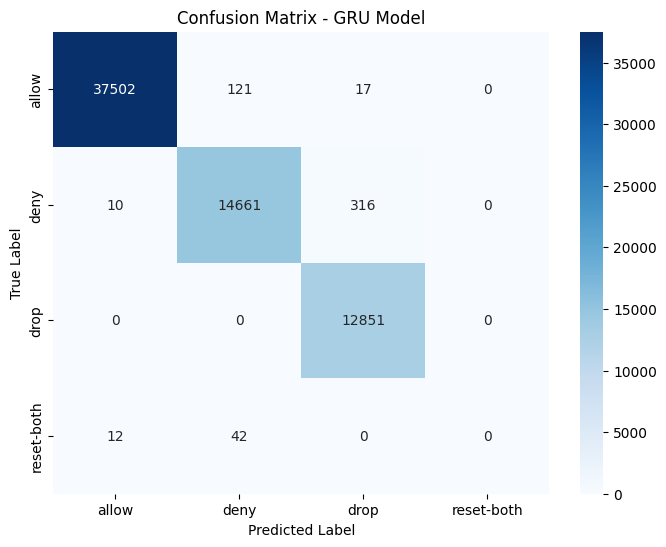

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - GRU Model")
plt.show()


In [16]:
print(classification_report(y_encoded, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     37640
        deny       0.99      0.98      0.98     14987
        drop       0.97      1.00      0.99     12851
  reset-both       0.00      0.00      0.00        54

    accuracy                           0.99     65532
   macro avg       0.74      0.74      0.74     65532
weighted avg       0.99      0.99      0.99     65532



E:\downloads\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\downloads\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\downloads\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_cnn,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dense, Dropout

gru_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    GRU(64, return_sequences=True),
    Dropout(0.3),
    GRU(32),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')
])


In [19]:
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=64,
    verbose=0
)



In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test, y_pred, average="weighted")
    }


In [23]:
cnn_results = evaluate_model(X_cnn, X_test, y_test)
gru_results = evaluate_model(gru_model, X_test, y_test)

comparison_df = pd.DataFrame([cnn_results, gru_results],
                             index=["CNN", "GRU"])

comparison_df


AttributeError: 'numpy.ndarray' object has no attribute 'predict'